In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks, peak_prominences, savgol_filter

In [2]:
liveData = pd.read_csv("live.csv", usecols=[0,1],names=['time','ch28'], header=None)
liveData.shape

(85000, 2)

In [3]:
#peak를 찾아 peak위치를 np배열 형태로 반환
def find_peak(signal, dist):
    pos_peaks, _ = find_peaks(signal, distance=dist)
    neg_peaks, _ = find_peaks(signal*-1, distance=dist)
    peaks = np.sort(np.concatenate((pos_peaks, neg_peaks)))
    return peaks

In [4]:
# 이웃한 peak끼리의 차이를 np배열로 반환
def find_peak_diff(signal,peaks): 
    peaks_val = signal[peaks]
    peaks_val_diff = -np.absolute(np.diff(peaks_val))
    return peaks_val_diff

In [5]:
#이웃한 peak들의 차이가 v이상인 index를 찾고 index에 해당하는 peak의 위치들을 반환
def peak_diff_condition_index(signal,peaks,v):
    peaks_val_diff = find_peak_diff(signal, peaks)
    index = [idx for idx,val in enumerate(peaks_val_diff) if val <= -v]
    print(index)
    result = peaks[index]
    return result

In [6]:
#이웃한 peak들의 차이가 v이상인 index를 찾고 index에 해당하는 peak의 개수들을 반환
def count_stimulus(signal,dist,v):
    peaks = find_peak(signal, dist)
    peaks_val_diff = find_peak_diff(signal, peaks)
    index = [idx for idx,val in enumerate(peaks_val_diff) if val <= -v]
    
    return len(index)

In [7]:
def plot_stimulus_detection(time,signal,dist,v):
    #fig = plt.figure(figsize=(30,10))
    
    #ax_ch1 = fig.add_subplot(2,2,1)
    #ax_ch1.set(xlim=[6,8], ylim=[-1500,1500], title='ch1')
    #ax_ch1.plot(time,signal)
    
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    #print(stimulus)
    ax_ch1.plot(time[stimulus],signal[stimulus],"y1",marker="o",ms=10,mfc="r")

In [8]:
#객체지향
def plot_stimulus_detection2(ax,time,signal,dist,v):
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    
    ax = ax.plot(time[stimulus],signal[stimulus],"y1",marker="o",ms=10,mfc="r")
    return ax

In [9]:
def plot_stimulus_heatmap(ax,signal,dist,v,cos):
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    stimulus_count = stimulus.size
    
    x_labels = []
    y_labels = []
    data = np.array([[2,1,0],[0,cos,0],[1,3,4]])
    
    # Plot the heatmap
    im = ax.imshow(data,cmap="Blues",)
    
    # Create colorbar
    #cbar = ax.fig.colorbar(im, ax=ax)
    
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    return im

<IPython.core.display.Javascript object>


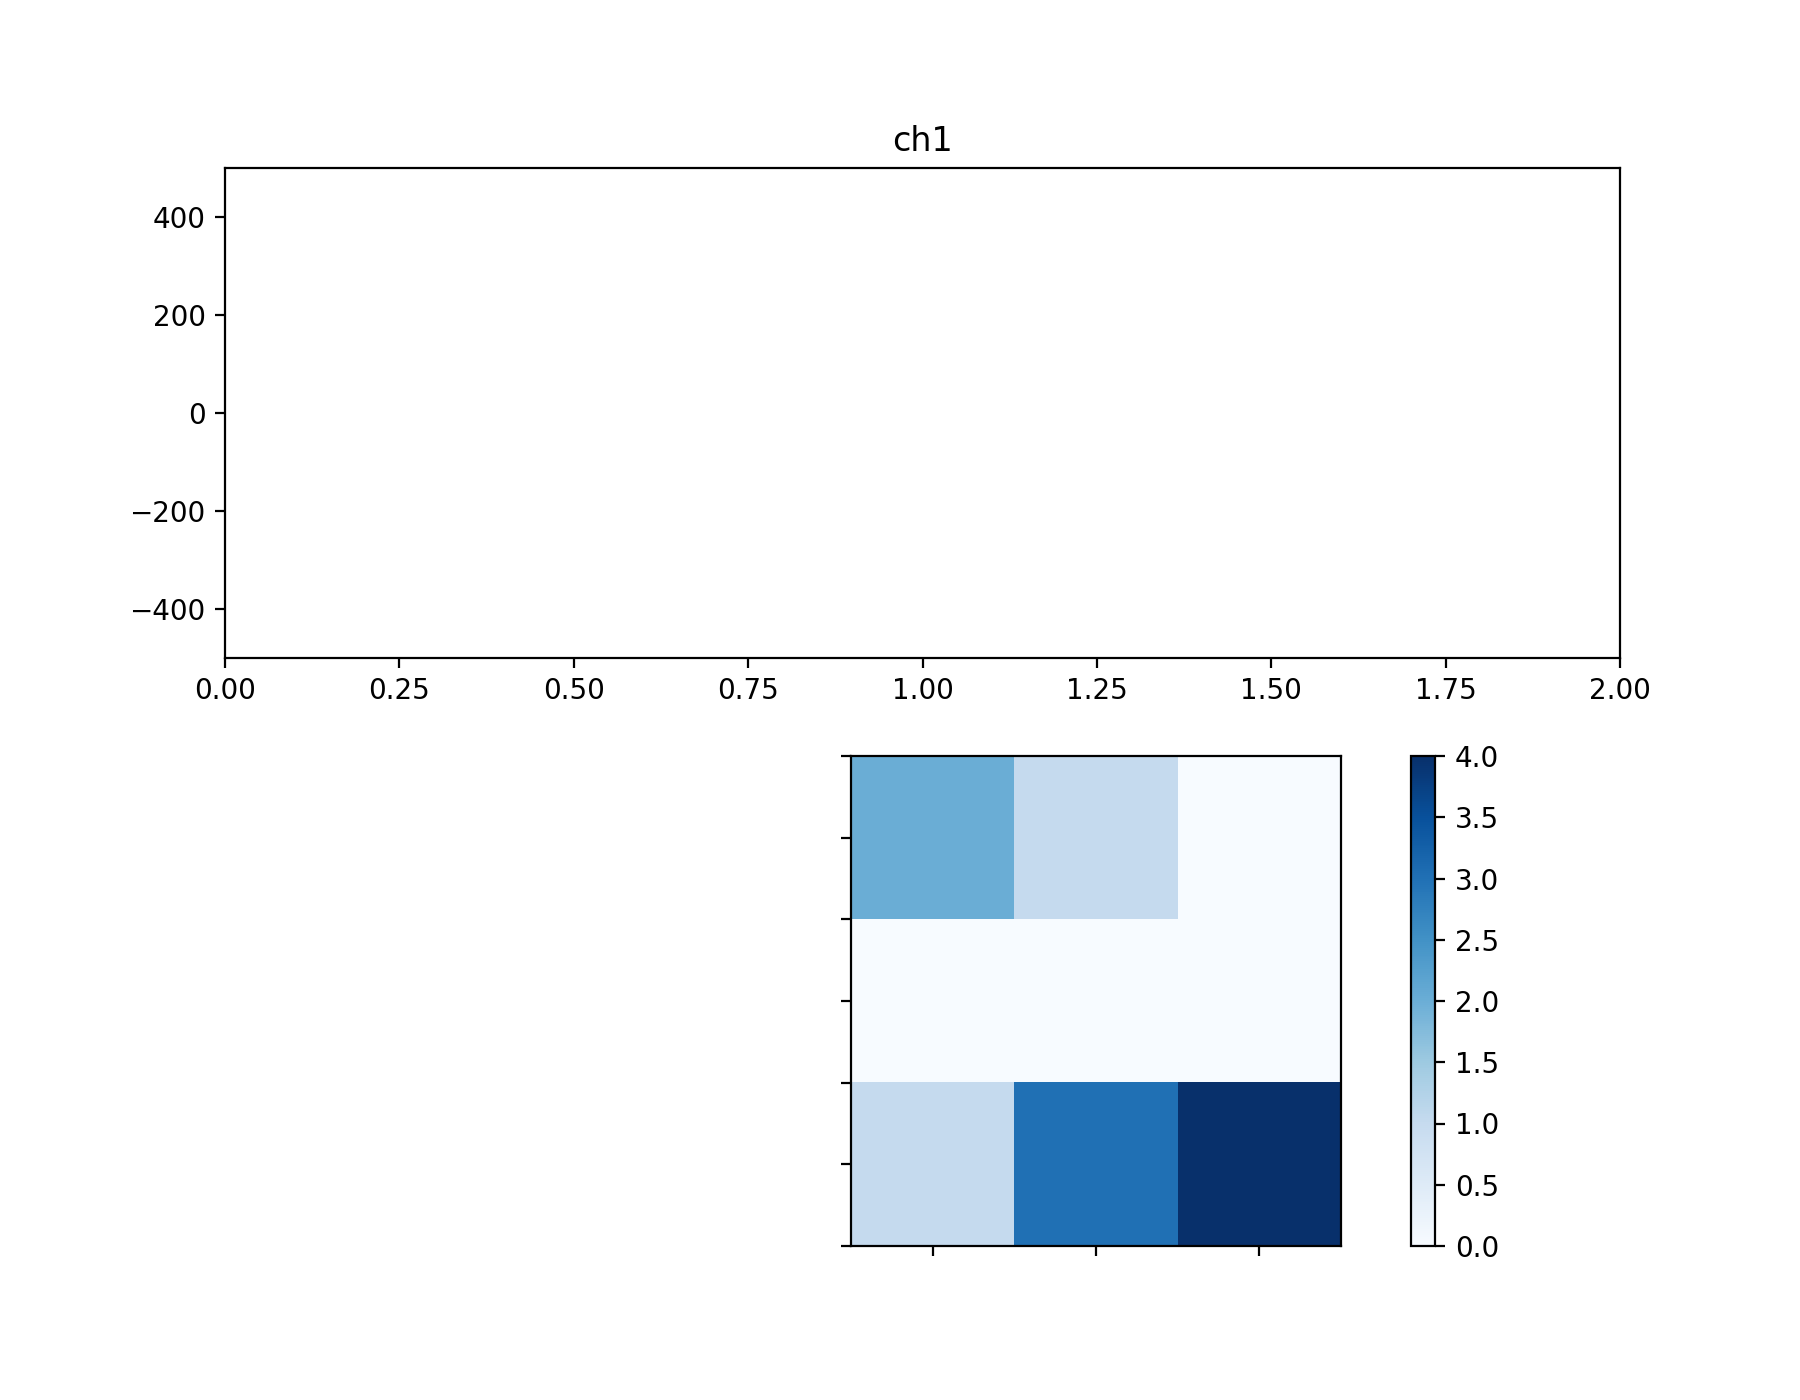

[594, 1555, 2464]


In [10]:
cols=[0,1]
labels=['time','ch28']
liveData = pd.read_csv("live.csv",usecols=cols, names=labels, header=None)
    
x = liveData['time']
#add ch
y1 = liveData['ch28']


fig = plt.figure(figsize=(9,7))
#add ch
ax_ch1 = fig.add_subplot(2,1,1)
ax_ch1.set(xlim=[0.,2.], ylim=[-500,500], title='ch1')

ax_ch2 = fig.add_subplot(2,1,2)
im = plot_stimulus_heatmap(ax_ch2,y1,50,180,0)
cbar = fig.colorbar(im,ax=ax_ch2)

#print(count_stimulus(y1,50,180))

In [11]:
def animate(i):
    #add ch
    cols=[0,1]
    labels=['time','ch28']
    liveData = pd.read_csv("live.csv",usecols=cols, names=labels, header=None)
    
    x = liveData['time']
    
    #add ch
    y1 = liveData['ch28']

    #add ch
    ax_ch1.clear()
    ax_ch2.clear()

    #add ch
    ax_ch1.set(xlim=[-1.+ i*0.1 ,0.+ i*0.1], ylim=[-500,500])
    
    #add ch
    ax_ch1.plot(x,y1)
    
    plot_stimulus_detection2(ax_ch1,x,y1,50,180)
    
    count = count_stimulus(y1,50,180)
    plot_stimulus_heatmap(ax_ch2,y1,50,180,count)
    

In [12]:
ani = FuncAnimation(fig, func=animate, frames= np.arange(0,300,1), interval=500) 
plt.show()

In [11]:
arr = [5, 7, 2, 1, 3, 4, 8, 8, 6, 6]
np.mean(arr)


5.0

In [12]:
np.percentile(arr,25)

[594, 1555, 2464]


3.25

In [13]:
((25 + 16 +9+ 16+ 1+ 1 +16)/ 9 ) ** 0.5

3.0550504633038935

In [14]:
1.75*1.5

2.625